In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('generic_sentiment_dataset_10k.csv')

In [15]:
df.head()

,sentiment,text,label
0,neutral,Camera good,1
1,negative,OMG! I KNOW! I give myself a stroke everytim...,0
2,neutral,Good,1
3,positive,The company recorded revenues of E658 .1 milli...,2
4,positive,All is good,2


In [17]:
# Here, Negative sentimant = 0
#       Neutral sentiment = 1
#       Positive sentiment = 2
df.shape

(10000, 3)

In [19]:
df.isnull().sum()

sentiment    0
text         1
label        0
dtype: int64

In [21]:
df['label'].value_counts()

label
2    5241
0    2782
1    1977
Name: count, dtype: int64

In [23]:
df['text'][1]

' OMG! I KNOW!  I give myself a stroke everytime I go getting mad at them. (Quietly with the windows rolled up.    )'

In [25]:
df = df.drop(['sentiment'], axis = 1)

In [27]:
df.tail()

,text,label
9995,Good mobile at mid segment level.,2
9996,"I found the product, the same as expected........",2
9997,It was amazing product....low price but camera...,2
9998,"With 6 gb ram and 128 gb memory, you do not ge...",0
9999,My husband loved it so 5 star for that,2


In [29]:
df.shape

(10000, 2)

In [31]:
print(len(df['text'][0]))

11


In [39]:
df = df.dropna()

In [41]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [43]:
df['char_count'] = df['text'].apply(len)

In [45]:
df.head()

,text,label,char_count
0,Camera good,1,11
1,OMG! I KNOW! I give myself a stroke everytim...,0,115
2,Good,1,4
3,The company recorded revenues of E658 .1 milli...,2,125
4,All is good,2,11


In [47]:
import nltk
from nltk.tokenize import word_tokenize

In [49]:
df['word_count'] = df['text'].apply(lambda x : len(str(x).split()))

In [51]:
df.head()

,text,label,char_count,word_count
0,Camera good,1,11,2
1,OMG! I KNOW! I give myself a stroke everytim...,0,115,22
2,Good,1,4,1
3,The company recorded revenues of E658 .1 milli...,2,125,24
4,All is good,2,11,3


In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
df['sent_count'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [57]:
df.head()

,text,label,char_count,word_count,sent_count
0,Camera good,1,11,2,1
1,OMG! I KNOW! I give myself a stroke everytim...,0,115,22,4
2,Good,1,4,1,1
3,The company recorded revenues of E658 .1 milli...,2,125,24,1
4,All is good,2,11,3,1


### Tokenization and Remove Stopwords

In [91]:
df['text'][1]

' OMG! I KNOW!  I give myself a stroke everytime I go getting mad at them. (Quietly with the windows rolled up.    )'

In [93]:
review = re.sub('[^a-zA-Z]', ' ', df['text'][1])
review

' OMG  I KNOW   I give myself a stroke everytime I go getting mad at them   Quietly with the windows rolled up      '

In [97]:
review = review.lower()
review

' omg  i know   i give myself a stroke everytime i go getting mad at them   quietly with the windows rolled up      '

In [99]:
review = review.split()
review

['omg',
 'i',
 'know',
 'i',
 'give',
 'myself',
 'a',
 'stroke',
 'everytime',
 'i',
 'go',
 'getting',
 'mad',
 'at',
 'them',
 'quietly',
 'with',
 'the',
 'windows',
 'rolled',
 'up']

In [119]:
from nltk.corpus import stopwords
all_stopwords = set(stopwords.words('english'))
all_stopwords.remove('not')

In [123]:
review = [word for word in review if word not in all_stopwords]
review

['b',
 'e',
 'l',
 'e',
 'v',
 ' ',
 'z',
 'n',
 ' ',
 'e',
 'l',
 'l',
 ' ',
 'e',
 'f',
 'e',
 'c',
 ' ',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'u',
 ' ',
 'p',
 'h',
 'n',
 'e',
 ' ',
 'n',
 'h',
 ' ',
 'u',
 'g',
 ' ',
 'l',
 'r',
 'e',
 ' ',
 'e',
 'e',
 ' ',
 'l',
 'g',
 ' ',
 'p',
 'e',
 'c',
 'l',
 ' ',
 'l',
 ' ',
 'e',
 'n',
 ' ',
 'c',
 'l',
 'l',
 ' ',
 'f',
 'n',
 'g',
 'e',
 'r',
 'p',
 'r',
 'n',
 ' ',
 'c',
 'n',
 'n',
 'e',
 'r',
 ' ',
 'f',
 'e',
 'n',
 ' ',
 'n',
 ' ',
 'r',
 'e',
 'p',
 'n',
 ' ',
 'b',
 'e',
 'l',
 'e',
 'v',
 ' ',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'u',
 ' ',
 'p',
 'h',
 'n',
 'e',
 ' ',
 'h',
 'n',
 'g',
 ' ',
 'u',
 'c',
 'h',
 ' ',
 'p',
 'l',
 'e',
 ' ',
 'u',
 'g',
 'g',
 'e',
 ' ',
 'g',
 'e',
 ' ',
 'u',
 ' ',
 'f',
 'x']

### Stemming

In [125]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [127]:
review

['b',
 'e',
 'l',
 'e',
 'v',
 ' ',
 'z',
 'n',
 ' ',
 'e',
 'l',
 'l',
 ' ',
 'e',
 'f',
 'e',
 'c',
 ' ',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'u',
 ' ',
 'p',
 'h',
 'n',
 'e',
 ' ',
 'n',
 'h',
 ' ',
 'u',
 'g',
 ' ',
 'l',
 'r',
 'e',
 ' ',
 'e',
 'e',
 ' ',
 'l',
 'g',
 ' ',
 'p',
 'e',
 'c',
 'l',
 ' ',
 'l',
 ' ',
 'e',
 'n',
 ' ',
 'c',
 'l',
 'l',
 ' ',
 'f',
 'n',
 'g',
 'e',
 'r',
 'p',
 'r',
 'n',
 ' ',
 'c',
 'n',
 'n',
 'e',
 'r',
 ' ',
 'f',
 'e',
 'n',
 ' ',
 'n',
 ' ',
 'r',
 'e',
 'p',
 'n',
 ' ',
 'b',
 'e',
 'l',
 'e',
 'v',
 ' ',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'u',
 ' ',
 'p',
 'h',
 'n',
 'e',
 ' ',
 'h',
 'n',
 'g',
 ' ',
 'u',
 'c',
 'h',
 ' ',
 'p',
 'l',
 'e',
 ' ',
 'u',
 'g',
 'g',
 'e',
 ' ',
 'g',
 'e',
 ' ',
 'u',
 ' ',
 'f',
 'x']

In [129]:
review = [ps.stem(word) for word in review]
review

['b',
 'e',
 'l',
 'e',
 'v',
 ' ',
 'z',
 'n',
 ' ',
 'e',
 'l',
 'l',
 ' ',
 'e',
 'f',
 'e',
 'c',
 ' ',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'u',
 ' ',
 'p',
 'h',
 'n',
 'e',
 ' ',
 'n',
 'h',
 ' ',
 'u',
 'g',
 ' ',
 'l',
 'r',
 'e',
 ' ',
 'e',
 'e',
 ' ',
 'l',
 'g',
 ' ',
 'p',
 'e',
 'c',
 'l',
 ' ',
 'l',
 ' ',
 'e',
 'n',
 ' ',
 'c',
 'l',
 'l',
 ' ',
 'f',
 'n',
 'g',
 'e',
 'r',
 'p',
 'r',
 'n',
 ' ',
 'c',
 'n',
 'n',
 'e',
 'r',
 ' ',
 'f',
 'e',
 'n',
 ' ',
 'n',
 ' ',
 'r',
 'e',
 'p',
 'n',
 ' ',
 'b',
 'e',
 'l',
 'e',
 'v',
 ' ',
 'n',
 'e',
 ' ',
 'p',
 'l',
 'u',
 ' ',
 'p',
 'h',
 'n',
 'e',
 ' ',
 'h',
 'n',
 'g',
 ' ',
 'u',
 'c',
 'h',
 ' ',
 'p',
 'l',
 'e',
 ' ',
 'u',
 'g',
 'g',
 'e',
 ' ',
 'g',
 'e',
 ' ',
 'u',
 ' ',
 'f',
 'x']

In [131]:
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
                   }
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords

In [141]:
import re
df.isnull().sum()

text          0
label         0
char_count    0
word_count    0
sent_count    0
dtype: int64

In [143]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['text'].iloc[i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if word not in stop_words]
    review = [ps.stem(word) for word in review]
    review = " ".join(review)
    corpus.append(review)

In [145]:
df['processed_text'] = corpus

In [147]:
df.head()

,text,label,char_count,word_count,sent_count,processed_text
0,Camera good,1,11,2,1,camera good
1,OMG! I KNOW! I give myself a stroke everytim...,0,115,22,4,omg know give stroke everytim go get mad quiet...
2,Good,1,4,1,1,good
3,The company recorded revenues of E658 .1 milli...,2,125,24,1,compani record revenu e million fiscal year en...
4,All is good,2,11,3,1,good


In [149]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 8, background_color = "white")

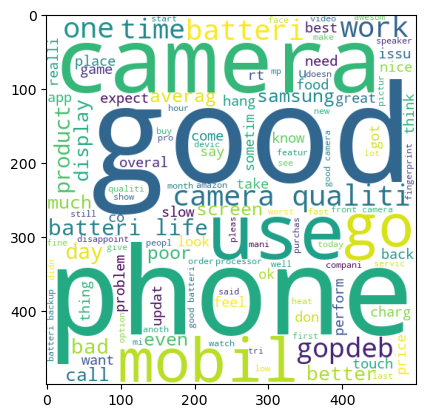

In [151]:
pos = wc.generate(df[df['label'] == 1]['processed_text'].str.cat(sep = " "))
plt.imshow(pos)

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 15000)

In [167]:
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [169]:
x.shape

(9999, 10959)

In [171]:
y = df['label']

In [176]:
import joblib

In [178]:
joblib.dump(cv,"count_v_res")

['count_v_res']

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [184]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [186]:
mnb = MultinomialNB()

In [188]:
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [190]:
mnb.score(xtest,ytest)

0.6963333333333334

In [192]:
lr = LogisticRegression()

In [194]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [196]:
lr.score(xtest,ytest)

0.6986666666666667

In [198]:
rf = RandomForestClassifier()

In [200]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [202]:
rf.score(xtest,ytest)

0.7223333333333334

In [212]:
import joblib

In [216]:
joblib.dump(rf, 'Generic_comment_sentiment')

['Generic_comment_sentiment']

In [218]:
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

In [224]:
class GenericCommentSentimentApp:
    def __init__(self, master):
        self.master = master
        master.title("Generic Comment Sentiment App")
        master.geometry("400x300")  # Set a custom size for the window

        # Load your pre-trained Random Forest model and CountVectorizer
        # Replace 'your_model.pkl' and 'your_vectorizer.pkl' with the actual filenames
        self.model = joblib.load('Generic_comment_sentiment')
        self.vectorizer = joblib.load('count_v_res')

        # Create and set up widgets
        title_font = ('Helvetica', 16, 'bold')  # Larger font for the title
        self.label = ttk.Label(master, text="Enter your generic comment :", font=title_font)
        self.label.pack(pady=10)

        self.text_entry = tk.Text(master, height=5, width=40)
        self.text_entry.pack(pady=10)

        # Increase button size and change color on press
        self.classify_button = ttk.Button(master, text="Classify", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        self.result_label = ttk.Label(master, text="")
        self.result_label.pack(pady=10)

        # Style configuration for the button
        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 12), width=15, foreground='black', background='#4CAF50', padding=(10, 5))
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', '!disabled', '#45a049'), ('active', '#4CAF50')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords
        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)
        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            # Transform the processed_input using the CountVectorizer
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 2 else "Negative" if prediction == 0 else "Neutral"
            self.result_label.config(text=f"Predicted Sentiment: {sentiment}")
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")
if __name__ == "__main__":
    root = tk.Tk()
    app = GenericCommentSentimentApp(root)
    root.mainloop()


# Here, Negative sentimant = 0
#       Neutral sentiment = 1
#       Positive sentiment = 2